In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20

import warnings
warnings.filterwarnings('ignore')

In [2]:
from vega_datasets import data
temp = data.sf_temps()

Use the above dataset for the exercises below:

    Resample by the day and take the average temperature. Visualize the average temperature over time.
    Write the code necessary to visualize the minimum temperature over time.
    Write the code necessary to visualize the maximum temperature over time.
    Which month is the coldest, on average?
    Which month has the highest average temperature?
    Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [3]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
temp.set_index('date', inplace =  True)

# #1
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
temp.resample('D').mean().head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

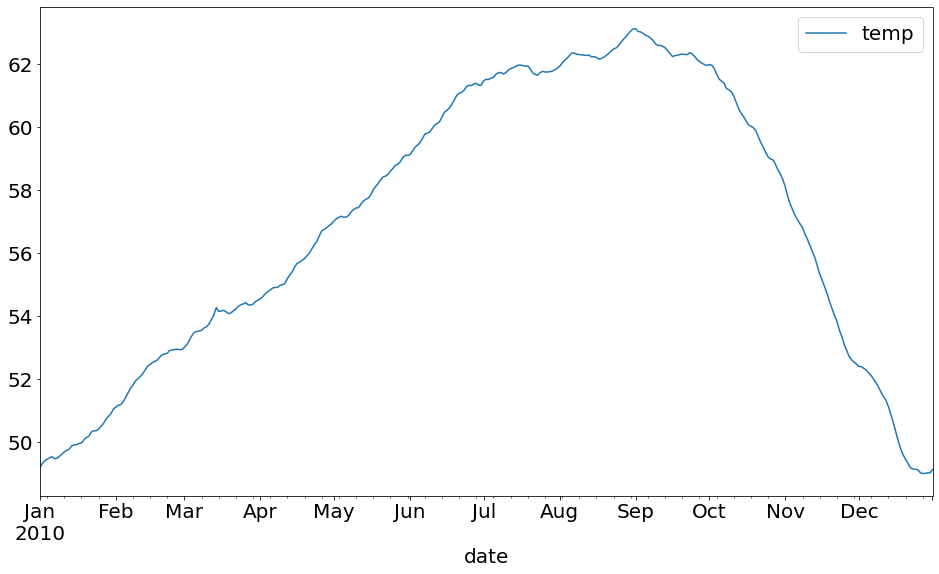

In [6]:
temp.resample('D').mean().plot()

# #2
write the code necessary to visualize the minimum temperature over time.

In [7]:
temp.resample('D').min().head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


<AxesSubplot:xlabel='date'>

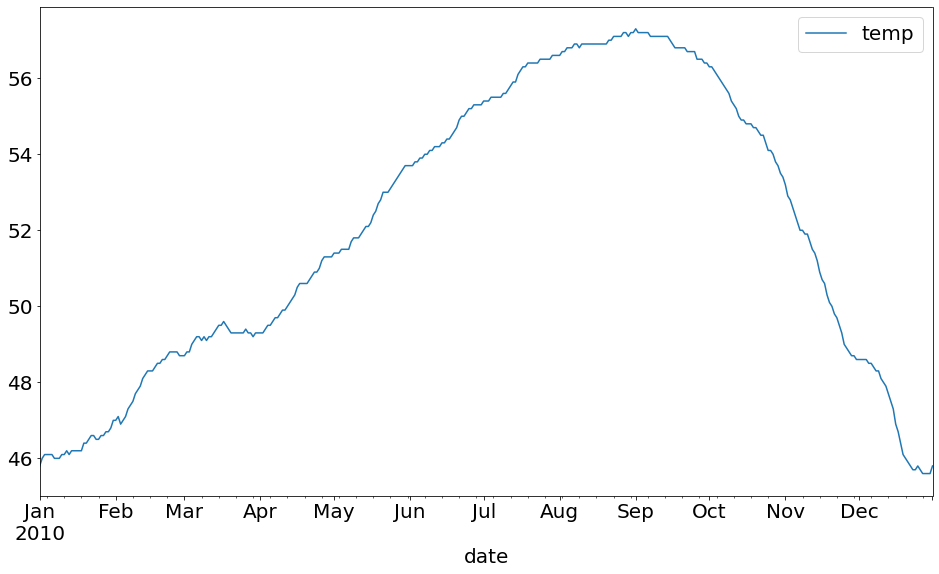

In [8]:
temp.resample('D').min().plot()

# #3
    Write the code necessary to visualize the maximum temperature over time.

In [9]:
temp.resample('D').max().head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


<AxesSubplot:xlabel='date'>

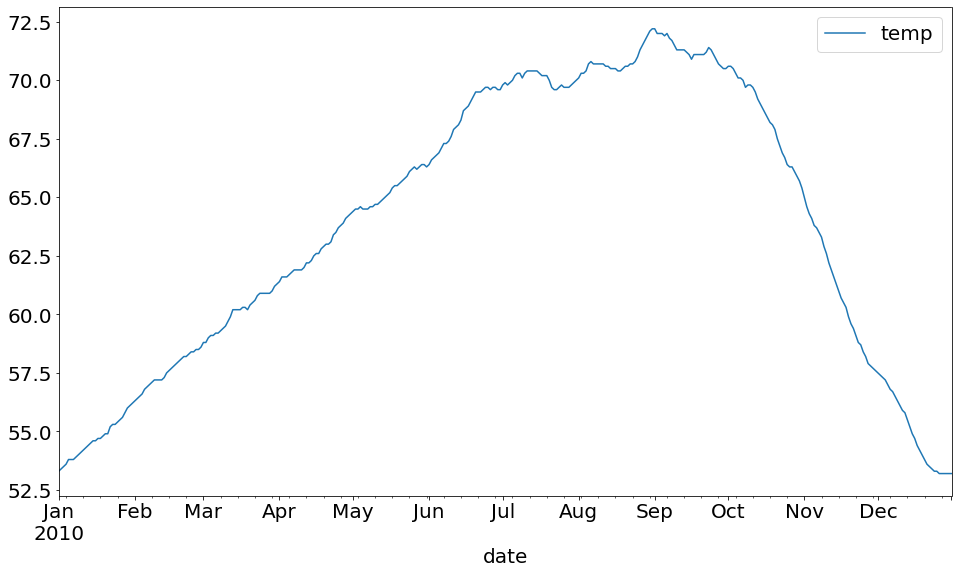

In [10]:
temp.resample('D').max().plot()

# #4
Which month is the coldest, on average?

# Jan

In [11]:
temp.resample('M').mean().sort_values('temp') # Jan

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


# #5
Which month has the highest average temperature?

# Sept

In [12]:
temp.resample('M').mean().sort_values('temp', ascending = False) # Sept

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091
2010-05-31,57.970968
2010-04-30,55.633056
2010-11-30,55.185139
2010-03-31,53.956528


# #6
    Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
    
    sept on avg
    aug has peak

In [13]:
temp_day = temp.resample('D').agg(['min', 'max'])
temp_day

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [14]:
temp_day.temp['min']

date
2010-01-01    45.8
2010-01-02    46.0
2010-01-03    46.1
2010-01-04    46.1
2010-01-05    46.1
              ... 
2010-12-27    45.6
2010-12-28    45.6
2010-12-29    45.6
2010-12-30    45.6
2010-12-31    45.8
Freq: D, Name: min, Length: 365, dtype: float64

In [15]:
temp_day['delta_T'] = temp_day.temp['max'] - temp_day.temp['min']

In [16]:
temp_day.resample('M').mean().sort_values('delta_T', ascending = False)
# on avg, september has the most varience

temp               delta_T
                  min        max           
date                                       
2010-09-30  56.903333  71.306667  14.403333
2010-07-31  56.045161  70.022581  13.977419
2010-06-30  54.480000  68.430000  13.950000
2010-08-31  56.941935  70.812903  13.870968
2010-10-31  54.932258  68.364516  13.432258
2010-05-31  52.403226  65.312903  12.909677
2010-04-30  50.326667  62.646667  12.320000
2010-03-31  49.238710  60.093548  10.854839
2010-11-30  50.776667  61.013333  10.236667
2010-02-28  48.064286  57.550000   9.485714
2010-01-31  46.309677  54.651613   8.341935
2010-12-31  47.025806  54.951613   7.925806

In [17]:
temp_day['delta_T'].sort_values(ascending = False)
# august has the single date with the highest variance

date
2010-08-31    15.0
2010-09-01    14.9
2010-08-30    14.9
2010-08-29    14.8
2010-09-02    14.8
              ... 
2010-12-25     7.5
2010-01-04     7.5
2010-12-31     7.4
2010-01-02     7.4
2010-01-03     7.4
Name: delta_T, Length: 365, dtype: float64

# Seattle data set

In [18]:
from vega_datasets import data
seattle = data.seattle_weather()

In [19]:
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain



    Which year and month combination has the highest amount of precipitation?
    Visualize the amount of monthly precipitation over time.
    Visualize the amount of wind over time. Choose a time interval you think is appropriate.
    Which year-month combination is the windiest?
    What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
    In which month does it rain the most?
    Which month has the most number of days with a non-zero amount of precipitation?


In [20]:
seattle.set_index('date', inplace = True)

# #1
Which year and month combination has the highest amount of precipitation? 

Dec 2015

In [21]:
seattle.resample('M').sum().sort_values('precipitation', ascending = False).head() #class review used .idxmax or idxmin throughout the assignment

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6
2014-03-31,240.0,400.1,168.2,114.0
2015-11-30,212.6,290.5,104.4,106.4
2012-11-30,210.5,339.8,156.8,96.6
2012-03-31,183.0,296.2,88.0,131.7


# #2
Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

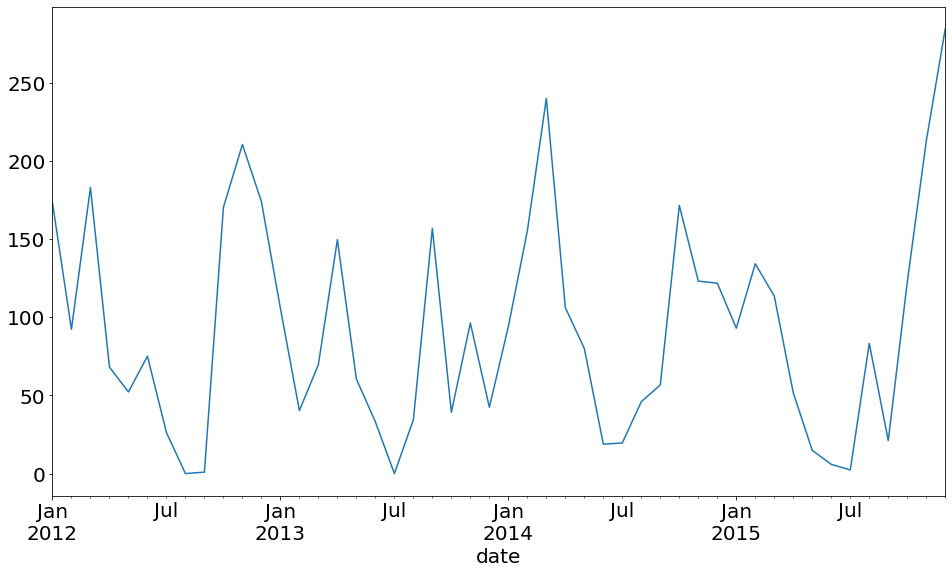

In [22]:
seattle.resample('M').sum().sort_values('date').precipitation.plot()

# #3
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

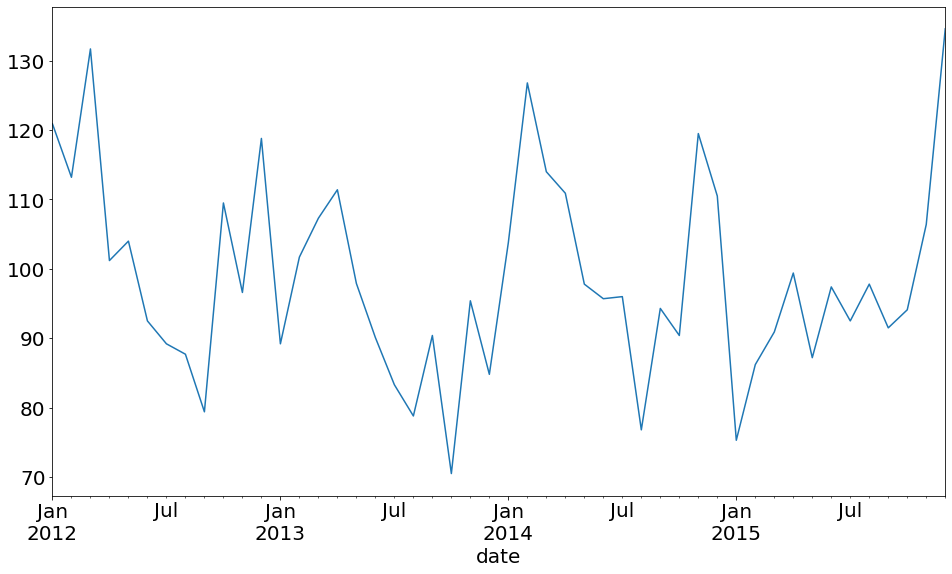

In [23]:
seattle.resample('M').sum().sort_values('date').wind.plot()

# #4
Which year-month combination is the windiest? 

# Dec 2015

In [24]:
seattle.resample('M').sum().sort_values('wind', ascending = False).head()

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,284.5,259.8,118.6,134.6
2012-03-31,183.0,296.2,88.0,131.7
2014-02-28,155.2,229.6,73.8,126.8
2012-01-31,173.3,218.7,47.8,120.9
2014-11-30,123.1,330.9,135.3,119.5


# #5
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?) 

# 2014

In [25]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [26]:
seattle.groupby('weather').sum()

,precipitation,temp_max,temp_min,wind
weather,,,,
drizzle,1.0,859.1,386.3,130.7
fog,2655.7,5947.3,3306.1,1417.0
rain,1321.8,3259.5,1707.9,951.0
snow,208.1,126.6,8.0,101.1
sun,239.4,13825.0,6622.7,2135.5


In [27]:
seattle['sun']= np.where(seattle.weather.str.contains('sun'), True, False)

In [28]:
seattle.resample('Y').sum()

,precipitation,temp_max,temp_min,wind,sun
date,,,,,
2012-12-31,1226.0,5591.3,2668.0,1244.7,118
2013-12-31,828.0,5861.5,2976.2,1100.8,205
2014-12-31,1232.8,6203.5,3161.8,1236.5,211
2015-12-31,1139.2,6361.2,3225.0,1153.3,180


# #6
In which month does it rain the most? 
avg:
Month year: NOV 2012
Month: February

sum:
November

In [29]:
seattle['rain']= np.where(seattle.weather.str.contains('rain'), True, False) #class review used sum i used mean. both are valid based on interpretation of question

In [30]:
seattle.resample('M').sum().sort_values('rain', ascending = False).head()

,precipitation,temp_max,temp_min,wind,sun,rain
date,,,,,,
2012-11-30,210.5,339.8,156.8,96.6,2,25
2012-12-31,174.0,224.3,102.1,118.8,1,23
2013-02-28,40.3,265.1,121.1,101.7,2,23
2012-03-31,183.0,296.2,88.0,131.7,6,19
2012-04-30,68.1,446.2,179.8,101.2,8,19


In [31]:
seattle['month'] = seattle.index.month_name()

In [32]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,sun,rain,month
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,January
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,January
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,January
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,January
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,January


In [33]:
seattle.groupby('month').mean().sort_values('rain', ascending = False)

,precipitation,temp_max,temp_min,wind,sun,rain
month,,,,,,
February,3.734513,9.860177,4.054867,3.786726,0.265487,0.353982
March,4.888710,12.387097,4.858871,3.579839,0.338710,0.298387
January,3.758065,8.229032,2.696774,3.138710,0.266129,0.282258
November,5.354167,11.023333,4.701667,3.482500,0.350000,0.208333
December,5.021774,8.194355,3.325000,3.618548,0.322581,0.185484
April,3.128333,15.020000,6.362500,3.524167,0.508333,0.166667
October,4.059677,16.389516,9.350806,2.939516,0.362903,0.161290
June,1.107500,22.400000,12.244167,3.130833,0.708333,0.158333
May,1.673387,19.295968,9.614516,3.120161,0.661290,0.129032


# #7
Which month has the most number of days with a non-zero amount of precipitation?

December

In [34]:
seattle['yes_rain']= np.where(seattle.precipitation != 0.0, True, False)

In [36]:
seattle.groupby('month').mean().sort_values('yes_rain', ascending = False)

,precipitation,temp_max,temp_min,wind,sun,rain,yes_rain
month,,,,,,,
December,5.021774,8.194355,3.325000,3.618548,0.322581,0.185484,0.653226
February,3.734513,9.860177,4.054867,3.786726,0.265487,0.353982,0.646018
November,5.354167,11.023333,4.701667,3.482500,0.350000,0.208333,0.591667
March,4.888710,12.387097,4.858871,3.579839,0.338710,0.298387,0.588710
January,3.758065,8.229032,2.696774,3.138710,0.266129,0.282258,0.532258
October,4.059677,16.389516,9.350806,2.939516,0.362903,0.161290,0.491935
April,3.128333,15.020000,6.362500,3.524167,0.508333,0.166667,0.491667
June,1.107500,22.400000,12.244167,3.130833,0.708333,0.158333,0.308333
September,1.962500,21.924167,12.358333,2.963333,0.591667,0.033333,0.291667


# Flight

In [37]:
flight = data.flights_20k()
flight.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


Convert any negative delays to 0. DONE
Which hour of the day has the highest average delay? 

3

Does the day of the week make a difference in the delay amount?

Friday is the worst

Does the month make a difference in the delay amount? 

February

In [38]:
flight.set_index('date', inplace = True)

In [39]:
flight['delay'] = np.where(flight.delay<0, 0, flight.delay)

In [40]:
flight.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [41]:
flight.resample('H').sum().head()

,delay,distance
date,,
2001-01-01 00:00:00,14,405
2001-01-01 01:00:00,0,0
2001-01-01 02:00:00,0,0
2001-01-01 03:00:00,0,0
2001-01-01 04:00:00,0,0


In [42]:
flight['hours']= flight.index.hour

In [43]:
flight.groupby('hours').mean().sort_values('delay', ascending = False).head(1)

,delay,distance
hours,,
3,302.5,322.0


In [44]:
flight.head()

,delay,distance,origin,destination,hours
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [45]:
flight['weekday'] = flight.index.day_name()
flight.head()

,delay,distance,origin,destination,hours,weekday
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [46]:
flight.groupby('weekday').mean().sort_values('delay', ascending = False)

,delay,distance,hours
weekday,,,
Friday,17.757596,501.118230,13.667107
Thursday,12.821322,485.175025,13.619728
Wednesday,11.032478,501.009094,13.588828
Sunday,10.413542,507.987758,14.236419
Tuesday,9.410866,496.021732,13.397963
Saturday,8.431498,550.889031,13.010670
Monday,7.165772,505.032215,13.454362


In [47]:
flight['month'] = flight.index.month_name()
flight.head()

,delay,distance,origin,destination,hours,weekday,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [48]:
flight.groupby('month').mean().sort_values('delay', ascending = False)

,delay,distance,hours
month,,,
February,12.306106,511.156170,13.644182
January,11.301592,500.391952,13.552771
March,9.875287,504.712069,13.531897
